Implementing a baysian classification model for predicting patterns of numbers.

In [1]:
import numpy as np
import sympy as sy
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

concepts = 32

Populating the interactive namespace from numpy and matplotlib


In [34]:
prior = np.ones((concepts))
prior[0] = 5
prior[1] = 5
prior[30] = .01
prior[31] = .01
prior = prior / np.sum(prior)


In [35]:
first = input('Please enter a set of numbers (a space in between each number): ')

Please enter a set of numbers (a space in between each number): 16


In [36]:
numbers = [int(i) for i in first.split(' ') if i.isdigit()]
vec = np.ones((len(numbers)))
for i in range(0, len(numbers)):
    vec[i] = numbers[i]

In [37]:
def even_check():
    if  np.all(vec%2==0) ==True:
        return (1/50)**(len(vec))
    else:
        return 0
       
def odd_check():
    if np.all(vec%2==1) ==True:
        return(1/50)**(len(vec))
    else:
        return 0
    
def squares_check():
    for j in range(0, len(vec)):
        my_continue = True
        i = 0
        while my_continue == True:
            if i**2 == vec[j]:
                my_continue = False
            if i == 11 :
                return 0 
            i = i + 1
    return (1/10)**(len(vec))
    
def mult_of_check(x):
    if np.all(vec%x==0) ==True:
        return (1/(100/x))**(len(vec))
    else:
        return 0
    
def ends_in_check(x):
    if np.all(vec%10==x)==True:
        return (1/10)**(len(vec))
    else:
        return 0  
    
def powers_of_check(x):
    for j in range(0, len(vec)):
        my_continue = True
        i = 0
        while my_continue == True:
            if x**i == vec[j]:
                my_continue = False
            if i == 7:
                return 0
            i = i+1
    counter = 0
    while x**counter<=100:
        counter = counter+1
    return (1/counter)**(len(vec))
            
                
    
def all_num():
    if np.all(vec>-1)==True:
        return(1/100)**(len(vec))
    else:
        return 0
    
def powers_of_two_plus():
    for j in range(0, len(vec)):
        my_continue = True
        i = 0
        while my_continue == True:
            if vec[j] == 2**i or vec[j] == 37:
                my_continue = False
            if i == 7:
                return 0
            i = i+1
    return(1/8)**(len(vec))

def powers_of_two_minus():
    for j in range(0, len(vec)):
        my_continue = True
        i = 0
        while my_continue == True:
            if vec[j] == 32:
                return 0
            if vec[j] == 2**i:
                my_continue = False
            if i == 7:
                return 0
            i = i+1
    return(1/6)**(len(vec))
    

In [38]:
likelihood = np.ones((concepts))
likelihood[0] = even_check()
likelihood[1] = odd_check()
likelihood[2] = squares_check()

for i in range(3, 11):
    likelihood[i] = mult_of_check(i)

for i in range(1, 10):
    likelihood[i+10] = ends_in_check(i)
    
for i in range(2, 11):
    likelihood[18+i] = powers_of_check(i)
    
likelihood[29] = all_num()
likelihood[30] = powers_of_two_plus()
likelihood[31] = powers_of_two_minus()

posterior = np.ones((concepts))
for i in range(0, 32):
    posterior[i] = likelihood[i]*prior[i]
    
posterior = posterior/np.sum(posterior)

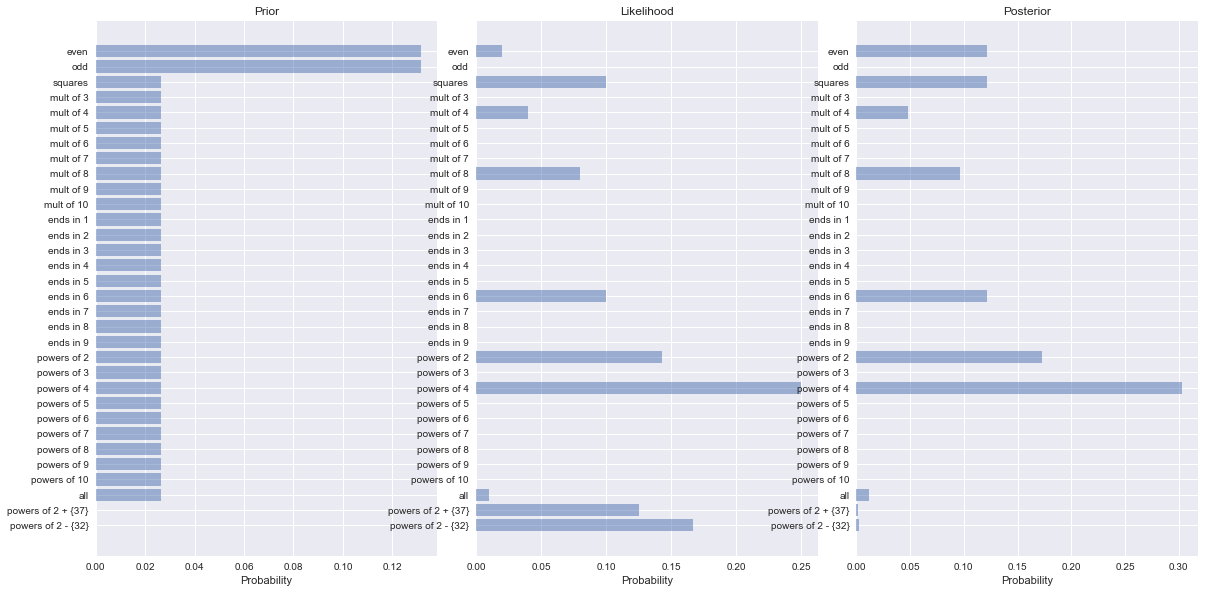

In [39]:
ax1 =plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
plt.tight_layout()
groups = ('even', 'odd', 'squares', 'mult of 3', 'mult of 4', 'mult of 5', 'mult of 6', 'mult of 7', 'mult of 8',
          'mult of 9', 'mult of 10', 'ends in 1', 'ends in 2', 'ends in 3', 'ends in 4', 'ends in 5'
          , 'ends in 6','ends in 7', 'ends in 8', 'ends in 9', 'powers of 2', 'powers of 3', 'powers of 4', 
          'powers of 5', 'powers of 6', 'powers of 7','powers of 8', 'powers of 9', 'powers of 10', 'all', 
          'powers of 2 + {37}', 'powers of 2 - {32}')

y_pos = np.arange(len(groups))

ax1.set_yticks(y_pos)
ax1.set_yticklabels(groups)
ax1.barh(y_pos, prior, align = 'center', alpha=.5)
ax1.invert_yaxis()  
ax1.set_xlabel('Probability')
ax1.set_title('Prior')



ax2.set_yticks(y_pos)
ax2.set_yticklabels(groups)
ax2.barh(y_pos, likelihood, align = 'center', alpha=.5)
ax2.invert_yaxis()  
ax2.set_xlabel('Probability')
ax2.set_title('Likelihood')



ax3.set_yticks(y_pos)
ax3.set_yticklabels(groups)
ax3.barh(y_pos, posterior, align = 'center', alpha=.5)
ax3.invert_yaxis()  
ax3.set_xlabel('Probability')
ax3.set_title('Posterior')


plt.show()


In [40]:
print(prior)

[ 0.13150973  0.13150973  0.02630195  0.02630195  0.02630195  0.02630195
  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195
  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195
  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195
  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195  0.02630195
  0.00026302  0.00026302]


In [41]:
print(likelihood)

[ 0.02        0.          0.1         0.          0.04        0.          0.
  0.          0.08        0.          0.          0.          0.          0.
  0.          0.          0.1         0.          0.          0.
  0.14285714  0.          0.25        0.          0.          0.          0.
  0.          0.          0.01        0.125       0.16666667]


In [42]:
print(posterior)

[ 0.12109854  0.          0.12109854  0.          0.04843941  0.          0.
  0.          0.09687883  0.          0.          0.          0.          0.
  0.          0.          0.12109854  0.          0.          0.
  0.17299791  0.          0.30274634  0.          0.          0.          0.
  0.          0.          0.01210985  0.00151373  0.00201831]


In [43]:
post_pred = np.ones((100))

for q in range(0, 100):
    vec=np.array([q])
    if even_check() != 0:
        post_pred[q] = posterior[0]
    else:
        post_pred[q] = posterior[1]
    if squares_check() !=0:
        post_pred[q] = post_pred[q]+posterior[2]
    for i in range(3, 11):
        if mult_of_check(i) !=0:
            post_pred[q] = post_pred[q] + posterior[i]
    for i in range(1, 10):
        if ends_in_check(i) !=0:
            post_pred[q] = post_pred[q] + posterior[i+10]
    for i in range(2, 11):
        if powers_of_check(i) !=0:
            post_pred[q] = post_pred[q] + posterior[18+i]
    if all_num() != 0:
        post_pred[q] = post_pred[q] + posterior[29]
    if powers_of_two_plus() != 0:
        post_pred[q] = post_pred[q] + posterior[30]
    if powers_of_two_minus() != 0:
        post_pred[q] = post_pred[q] + posterior[31]


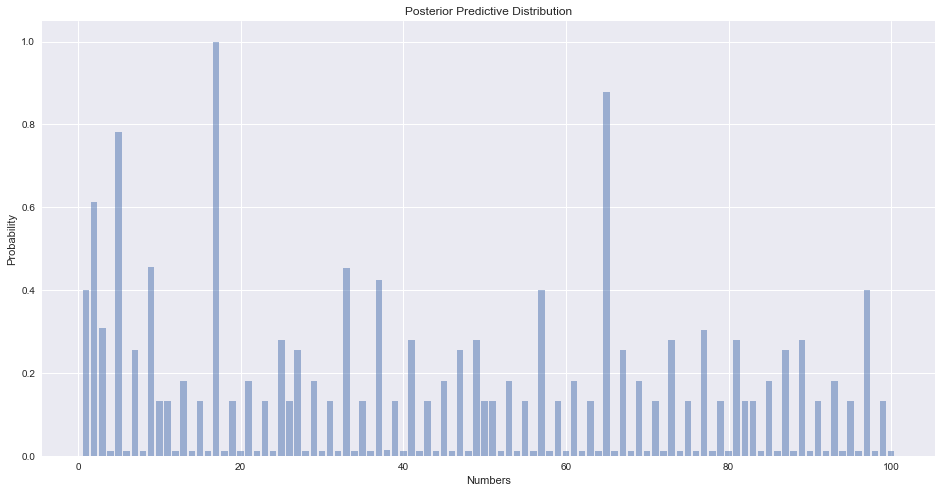

In [44]:
x_pos = np.arange(len(post_pred))
plt.bar(x_pos+1, post_pred, align = 'center', alpha=.5)
plt.xlabel("Numbers")
plt.ylabel("Probability")
plt.title('Posterior Predictive Distribution')

plt.show()

In [45]:
print(post_pred)

[ 0.39962517  0.61248468  0.30973834  0.01210985  0.78202263  0.01210985
  0.25430693  0.01210985  0.45505658  0.13320839  0.13320839  0.01210985
  0.18164781  0.01210985  0.13320839  0.01210985  1.          0.01210985
  0.13320839  0.01210985  0.18164781  0.01210985  0.13320839  0.01210985
  0.27852663  0.13320839  0.25430693  0.01210985  0.18164781  0.01210985
  0.13320839  0.01210985  0.45303828  0.01210985  0.13320839  0.01210985
  0.42384488  0.01362359  0.13320839  0.01210985  0.27852663  0.01210985
  0.13320839  0.01210985  0.18164781  0.01210985  0.25430693  0.01210985
  0.27852663  0.13320839  0.13320839  0.01210985  0.18164781  0.01210985
  0.13320839  0.01210985  0.39962517  0.01210985  0.13320839  0.01210985
  0.18164781  0.01210985  0.13320839  0.01210985  0.87890146  0.01210985
  0.25430693  0.01210985  0.18164781  0.01210985  0.13320839  0.01210985
  0.27852663  0.01210985  0.13320839  0.01210985  0.30274634  0.01210985
  0.13320839  0.01210985  0.27852663  0.13320839  0